In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer

In [2]:
em=pd.read_csv("Elon_musk.csv",encoding='unicode_escape')
em

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA

In [3]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
em.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

# Dropping the Unnamed column

In [5]:
em=em.drop(columns=('Unnamed: 0'),axis=1)

In [6]:
em

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
from nltk.corpus import stopwords

In [8]:
ps=PorterStemmer()
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Data preprocessing

# 1)Remove space and symbols in Text column

In [9]:
em.Text=em.Text.apply(lambda x: re.sub('[^a-zA-Z]'," ",x))

In [10]:
em.head()

,Text
0,kunalb I m an alien
1,ID AA Carmack Ray tracing on Cyberpunk with H...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazi...


# 2) Make Text from upper case to lower case

In [11]:
em.Text=em.Text.apply(lambda x: x.lower())

In [12]:
em.head()

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazi...


# 3) Splitting the WORDS from line

In [13]:
em.Text=em.Text.apply(lambda x: x.split())

In [14]:
em

,Text
0,"[kunalb, i, m, an, alien]"
1,"[id, aa, carmack, ray, tracing, on, cyberpunk,..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, u, f,..."


# 4) Removing the stop words

In [15]:
em.Text=em.Text.apply(lambda x:[word for word in x if word not in set(stopwords.words("english"))])

In [16]:
em.head()

,Text
0,"[kunalb, alien]"
1,"[id, aa, carmack, ray, tracing, cyberpunk, hdr..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, underestimated]"
4,"[teslacn, congratulations, tesla, china, amazi..."


# 5) Stemming

In [17]:
em.Text=em.Text.apply(lambda x:[ps.stem(word) for word in x])

In [18]:
em.head()

,Text
0,"[kunalb, alien]"
1,"[id, aa, carmack, ray, trace, cyberpunk, hdr, ..."
2,"[joerogan, spotifi, great, interview]"
3,"[gtera, doge, underestim]"
4,"[teslacn, congratul, tesla, china, amaz, execu..."


# 6) Rejoining

In [19]:
em['Text']=em['Text'].apply(lambda x:" ".join(x))

In [20]:
em.head()

,Text
0,kunalb alien
1,id aa carmack ray trace cyberpunk hdr next lev...
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...


# 7) Sentiment Analysis

In [21]:
from textblob import TextBlob
em['Text']=em['Text'].apply(lambda x: TextBlob(x).sentiment[0])

In [22]:
em

,Text
0,-0.250000
1,0.000000
2,0.800000
3,0.000000
4,0.000000
...,...
1994,0.186667
1995,0.500000
1996,0.000000
1997,-0.375000


In [23]:
em["sentiment"]=''
em.loc[em["Text"]>0,"sentiment"]="positive"
em.loc[em["Text"]==0,"sentiment"]="neutral"
em.loc[em["Text"]<0,"sentiment"]="negative"


In [24]:
em

,Text,sentiment
0,-0.250000,negative
1,0.000000,neutral
2,0.800000,positive
3,0.000000,neutral
4,0.000000,neutral
...,...,...
1994,0.186667,positive
1995,0.500000,positive
1996,0.000000,neutral
1997,-0.375000,negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

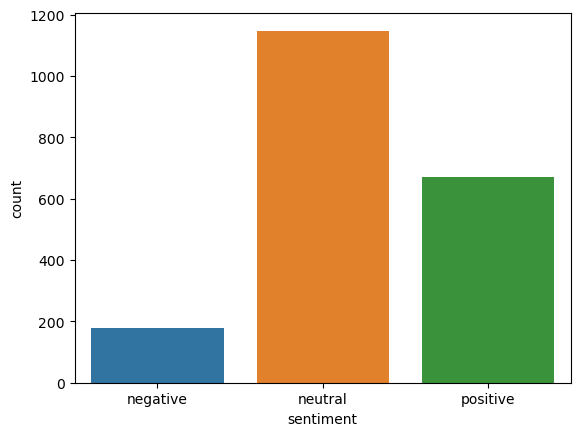

In [25]:
import seaborn as sns
sns.countplot(x=em["sentiment"])

# Problem Statement 2

1) Extracting reviews of any product from ecommerce website like amaszon

2) Perform emotion mining

# scrapping reviews using Beautiful Soup

In [26]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [27]:
bb='https://www.amazon.in/product-reviews/0143442287/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar'

Getting reviews of first 5 pages

In [28]:
review_list=[]
for k in range(0,6):
    review_link=bb+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    sp=BeautifulSoup(page.content,'html.parser')
    reviews=sp.find_all('span',class_='review-text-content')
    for i in range(0,len(reviews)):
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/product-reviews/0143442287/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar&pageNumber=0
https://www.amazon.in/product-reviews/0143442287/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar&pageNumber=1
https://www.amazon.in/product-reviews/0143442287/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar&pageNumber=2
https://www.amazon.in/product-reviews/0143442287/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar&pageNumber=3
https://www.amazon.in/product-reviews/0143442287/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar&pageNumber=4
https://www.amazon.in/product-reviews/0143442287/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar&pageNumber=5


In [29]:
review_list

['Just the book one needs in times of distress.This book will always remain as my means of solace and spiritual guiding force.My heartfelt Thanks! to Gaur Gopal Dasji for writing this fabulous book  for humanity.',
 'As always, Gaur Gopal Das way of explanation will intrigue the readers, the way he uses the anecdotes to explain any concept in an understanding manner will make the readers fall in love.',
 'Book is good. But packaging was poor. Book condition is not satisfying. Should handle books with extra care.',
 '',
 'Keeps you engrossed and has a lot of practical tips',
 'Thank you... 😊',
 'A very good book for self help.',
 "As the go from chapter-1 to last chapter, you'll discover more and more. To understand self as well as others, this masterpiece should be referred again and again.",
 'An incredible text & illustration also the flow of rhythm of book content that keeps you so much attached. Thank you so much for a great uplifting creation like this!!',
 'Best motivated book I 

In [30]:
len(review_list)

60

In [31]:
dt=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth',800)
dt

,Reviews
0,Just the book one needs in times of distress.This book will always remain as my means of solace and spiritual guiding force.My heartfelt Thanks! to Gaur Gopal Dasji for writing this fabulous book for humanity.
1,"As always, Gaur Gopal Das way of explanation will intrigue the readers, the way he uses the anecdotes to explain any concept in an understanding manner will make the readers fall in love."
2,Book is good. But packaging was poor. Book condition is not satisfying. Should handle books with extra care.
3,
4,Keeps you engrossed and has a lot of practical tips
5,Thank you... 😊
6,A very good book for self help.
7,"As the go from chapter-1 to last chapter, you'll discover more and more. To understand self as well as others, this masterpiece should be referred again and again."
8,An incredible text & illustration also the flow of rhythm of book content that keeps you so much attached. Thank you so much for a great uplifting creation like this!!
9,Best motivated book I have ever read .. Thanks to the author for describing in so easy way


# Text preprocessing

In [32]:
def preprocess(x):
    x=re.sub('[^a-zA-Z ]','',x)
    x=x.lower()
    x=x.split()
    x=[word for word in x if word not in set(stopwords.words('english'))]
    x=[ps.stem(word) for word in x]
    x=" ".join(x)
    return x

In [33]:
dt["Reviews"]=dt["Reviews"].apply(preprocess)

In [34]:
dt

,Reviews
0,book one need time distressthi book alway remain mean solac spiritu guid forcemi heartfelt thank gaur gopal dasji write fabul book human
1,alway gaur gopal da way explan intrigu reader way use anecdot explain concept understand manner make reader fall love
2,book good packag poor book condit satisfi handl book extra care
3,
4,keep engross lot practic tip
5,thank
6,good book self help
7,go chapter last chapter youll discov understand self well other masterpiec refer
8,incred text illustr also flow rhythm book content keep much attach thank much great uplift creation like
9,best motiv book ever read thank author describ easi way


In [35]:
from wordcloud import WordCloud

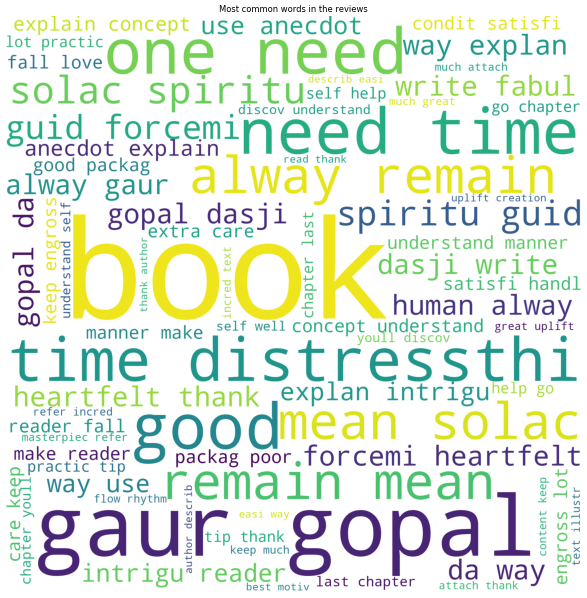

In [36]:
wordcloud = WordCloud(height=2000,width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(dt['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [37]:
from textblob import TextBlob
dt['sentiment_score'] = dt['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
dt[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,book one need time distressthi book alway remain mean solac spiritu guid forcemi heartfelt thank gaur gopal dasji write fabul book human,-0.104167
1,alway gaur gopal da way explan intrigu reader way use anecdot explain concept understand manner make reader fall love,0.500000
2,book good packag poor book condit satisfi handl book extra care,0.100000
3,,0.000000
4,keep engross lot practic tip,0.000000


In [38]:
def sentiment_category(score11):
    if(score11 > 0.5):
        return 'Positive'
    elif(score11 < 0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [39]:
dt['sentiment'] = dt['sentiment_score'].apply(lambda x:sentiment_category(x))

In [40]:
dt

,Reviews,sentiment_score,sentiment
0,book one need time distressthi book alway remain mean solac spiritu guid forcemi heartfelt thank gaur gopal dasji write fabul book human,-0.104167,Negative
1,alway gaur gopal da way explan intrigu reader way use anecdot explain concept understand manner make reader fall love,0.500000,Neutral
2,book good packag poor book condit satisfi handl book extra care,0.100000,Negative
3,,0.000000,Negative
4,keep engross lot practic tip,0.000000,Negative
5,thank,0.000000,Negative
6,good book self help,0.700000,Positive
7,go chapter last chapter youll discov understand self well other masterpiec refer,-0.062500,Negative
8,incred text illustr also flow rhythm book content keep much attach thank much great uplift creation like,0.500000,Neutral
9,best motiv book ever read thank author describ easi way,1.000000,Positive


In [41]:
dt['sentiment'].value_counts()

Negative    36
Neutral     12
Positive    12
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

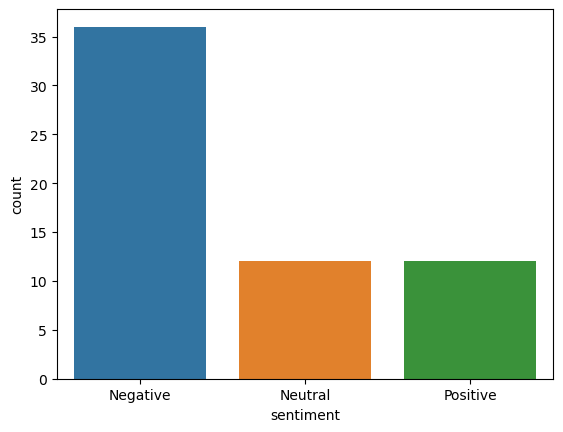

In [42]:
sns.countplot(x=dt['sentiment'])